In [56]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv(r"C:\Users\santo\Downloads\Top5leagues.csv")

In [58]:
df.head()

,Index,Player,Nation,Squad,Age,Born,Playing Time MP,Playing Time Starts,Playing Time Min,Playing Time 90s,...,Per 90 Minutes G-PK,Per 90 Minutes G+A-PK,Per 90 Minutes xG,Per 90 Minutes xAG,Per 90 Minutes xG+xAG,Per 90 Minutes npxG,Per 90 Minutes npxG+xAG,Position_2,Position,League
0,1,Max Aarons,ENG,Bournemouth,24.0,2000,14,12,1085,12.1,...,0.00,0.08,0.00,0.07,0.07,0.00,0.07,NaN,Defender,Premier League
1,2,Brenden Aaronson,USA,Union Berlin,23.0,2000,13,5,408,4.5,...,0.00,0.00,0.05,0.06,0.11,0.05,0.11,NaN,Midfielder,NaN
2,3,Paxten Aaronson,USA,Eint Frankfurt,20.0,2003,7,1,101,1.1,...,0.00,0.89,0.11,0.07,0.19,0.11,0.19,NaN,Midfielder,NaN
3,4,Yunis Abdelhamid,MAR,Reims,36.0,1987,16,16,1440,16.0,...,0.19,0.19,0.14,0.01,0.15,0.14,0.15,NaN,Defender,Ligue 1
4,5,Salis Abdul Samed,GHA,Lens,23.0,2000,17,14,1249,13.9,...,0.00,0.00,0.06,0.04,0.10,0.06,0.10,NaN,Midfielder,Ligue 1


In [59]:
df.columns

Index(['Index', 'Player', 'Nation', 'Squad', 'Age', 'Born', 'Playing Time MP',
       'Playing Time Starts', 'Playing Time Min', 'Playing Time 90s',
       'Performance Gls', 'Performance Ast', 'Performance G+A',
       'Performance G-PK', 'Performance PK', 'Performance PKatt',
       'Performance CrdY', 'Performance CrdR', 'Expected xG', 'Expected npxG',
       'Expected xAG', 'Expected npxG+xAG', 'Progression PrgC',
       'Progression PrgP', 'Progression PrgR', 'Per 90 Minutes Gls',
       'Per 90 Minutes Ast', 'Per 90 Minutes G+A', 'Per 90 Minutes G-PK',
       'Per 90 Minutes G+A-PK', 'Per 90 Minutes xG', 'Per 90 Minutes xAG',
       'Per 90 Minutes xG+xAG', 'Per 90 Minutes npxG',
       'Per 90 Minutes npxG+xAG', 'Position_2', 'Position', 'League'],
      dtype='object')

In [60]:
df = df.loc[(df['Position']=='Midfielder') & (df['Playing Time 90s']>12)]

In [61]:
df.head

<bound method NDFrame.head of       Index                      Player Nation          Squad   Age  Born  \
4         5           Salis Abdul Samed    GHA           Lens  23.0  2000   
5         6             Laurent Abergel    FRA        Lorient  30.0  1993   
25       26            Michel Aebischer    SUI        Bologna  27.0  1997   
52       53                Luis Alberto    ESP          Lazio  31.0  1992   
54       55               Rubén Alcaraz    ESP          Cádiz  32.0  1991   
...     ...                         ...    ...            ...   ...   ...   
2503   2504  Andre-Frank Zambo Anguissa    CMR         Napoli  28.0  1995   
2511   2512              Bryan Zaragoza    ESP        Granada  22.0  2001   
2523   2524             Piotr Zieliński    POL         Napoli  29.0  1994   
2533   2534            Martín Zubimendi    ESP  Real Sociedad  24.0  1999   
2536   2537             Martin Ødegaard    NOR        Arsenal  25.0  1998   

      Playing Time MP  Playing Time Starts  P

In [62]:
df.columns

Index(['Index', 'Player', 'Nation', 'Squad', 'Age', 'Born', 'Playing Time MP',
       'Playing Time Starts', 'Playing Time Min', 'Playing Time 90s',
       'Performance Gls', 'Performance Ast', 'Performance G+A',
       'Performance G-PK', 'Performance PK', 'Performance PKatt',
       'Performance CrdY', 'Performance CrdR', 'Expected xG', 'Expected npxG',
       'Expected xAG', 'Expected npxG+xAG', 'Progression PrgC',
       'Progression PrgP', 'Progression PrgR', 'Per 90 Minutes Gls',
       'Per 90 Minutes Ast', 'Per 90 Minutes G+A', 'Per 90 Minutes G-PK',
       'Per 90 Minutes G+A-PK', 'Per 90 Minutes xG', 'Per 90 Minutes xAG',
       'Per 90 Minutes xG+xAG', 'Per 90 Minutes npxG',
       'Per 90 Minutes npxG+xAG', 'Position_2', 'Position', 'League'],
      dtype='object')

In [63]:
df = df.drop(['Nation', 'Squad','Age','Born','Playing Time MP',
       'Playing Time Starts', 'Playing Time Min', 'Playing Time 90s','Performance G+A',
       'Performance G-PK', 'Performance PK', 'Performance PKatt',
       'Performance CrdY', 'Performance CrdR', 'Expected npxG+xAG','Per 90 Minutes G+A', 'Per 90 Minutes G-PK',
       'Per 90 Minutes G+A-PK','Per 90 Minutes xG+xAG',
       'Per 90 Minutes npxG+xAG', 'Position_2', 'Position', 'League'], axis=1)

In [64]:
df.head()

,Index,Player,Performance Gls,Performance Ast,Expected xG,Expected npxG,Expected xAG,Progression PrgC,Progression PrgP,Progression PrgR,Per 90 Minutes Gls,Per 90 Minutes Ast,Per 90 Minutes xG,Per 90 Minutes xAG,Per 90 Minutes npxG
4,5,Salis Abdul Samed,0,0,0.8,0.8,0.5,7,69,17,0.00,0.00,0.06,0.04,0.06
5,6,Laurent Abergel,1,1,0.5,0.5,0.9,14,86,30,0.06,0.06,0.03,0.05,0.03
25,26,Michel Aebischer,0,1,0.3,0.3,1.0,15,76,25,0.00,0.07,0.02,0.07,0.02
52,53,Luis Alberto,3,2,2.5,2.5,2.1,53,132,62,0.21,0.14,0.18,0.15,0.18
54,55,Rubén Alcaraz,2,0,1.6,0.8,0.2,13,72,16,0.11,0.00,0.08,0.01,0.04


In [65]:
# Define a dictionary mapping old column names to new column names
column_name_mapping = {
    'Performance Gls': 'Goals',
    'Performance Ast': 'Assists',
    'Expected xG': 'xGoals',
    'Expected npxG': 'npxGoals',
    'Expected xAG': 'xAssists',
    'Progression PrgC': 'Prg Carries',
    'Progression PrgP': 'Prg Passes',
    'Progression PrgR': 'Prg Receptions',
    'Per 90 Minutes Gls': 'Goals P90',
    'Per 90 Minutes Ast': 'Assists P90',
    'Per 90 Minutes xG': 'xGoals P90',
    'Per 90 Minutes xAG': 'xAssists P90',
    'Per 90 Minutes npxG':'npXgoals P90',
}

# Use the rename method to change column names
df.rename(columns=column_name_mapping, inplace=True)

In [66]:
df.head()

,Index,Player,Goals,Assists,xGoals,npxGoals,xAssists,Prg Carries,Prg Passes,Prg Receptions,Goals P90,Assists P90,xGoals P90,xAssists P90,npXgoals P90
4,5,Salis Abdul Samed,0,0,0.8,0.8,0.5,7,69,17,0.00,0.00,0.06,0.04,0.06
5,6,Laurent Abergel,1,1,0.5,0.5,0.9,14,86,30,0.06,0.06,0.03,0.05,0.03
25,26,Michel Aebischer,0,1,0.3,0.3,1.0,15,76,25,0.00,0.07,0.02,0.07,0.02
52,53,Luis Alberto,3,2,2.5,2.5,2.1,53,132,62,0.21,0.14,0.18,0.15,0.18
54,55,Rubén Alcaraz,2,0,1.6,0.8,0.2,13,72,16,0.11,0.00,0.08,0.01,0.04


In [67]:
#Create a parameter list
params = list(df.columns)
params

['Index',
 'Player',
 'Goals',
 'Assists',
 'xGoals',
 'npxGoals',
 'xAssists',
 'Prg Carries',
 'Prg Passes',
 'Prg Receptions',
 'Goals P90',
 'Assists P90',
 'xGoals P90',
 'xAssists P90',
 'npXgoals P90']

In [68]:
params = params[2:]
params

['Goals',
 'Assists',
 'xGoals',
 'npxGoals',
 'xAssists',
 'Prg Carries',
 'Prg Passes',
 'Prg Receptions',
 'Goals P90',
 'Assists P90',
 'xGoals P90',
 'xAssists P90',
 'npXgoals P90']

In [69]:
player = df.loc[df['Player']=='Jude Bellingham'].reset_index()
player = list(player.loc[0])
print(player)

[226, 227, 'Jude Bellingham', 14, 3, 8.2, 7.4, 2.6, 59, 132, 117, 0.81, 0.17, 0.47, 0.15, 0.43]


In [70]:
df.Player.values

array(['Salis Abdul Samed', 'Laurent Abergel', 'Michel Aebischer',
       'Luis Alberto', 'Rubén Alcaraz', 'Iván Alejo', 'Edson Álvarez',
       'Julián Álvarez', 'Benjamin André', 'Maximilian Arnold',
       'Sergio Arribas', 'Milan Badelj', 'Alex Baena', 'Jonathan Bamba',
       'Nicolò Barella', 'Ross Barkley', 'Leandro Barreiro Martins',
       'Enzo Barrenechea', 'Jude Bellingham', 'Fran Beltrán',
       'Sander Berge', 'Philip Billing', 'Yves Bissouma',
       'Antonio Blanco', 'Daniel Boloca', 'Giacomo Bonaventura',
       'Benjamin Bourigeaud', 'Edoardo Bove', 'Julian Brandt',
       'Josh Brownhill', 'Moisés Caicedo', 'Hakan Çalhanoğlu',
       'Lamine Camara', 'Antonio Candreva', 'Étienne Capoue',
       'Maxence Caqueret', 'Cristian Cásseres Jr.', 'Muhammed Cham',
       'Rayan Cherki', 'Pedro Chirivella', 'Joris Chotard',
       'Ryan Christie', 'Andrea Colpani', 'Lewis Cook', 'Samu Costa',
       'Lassana Coulibaly', 'Bryan Cristante', 'Sergi Darder',
       'Ermedin Demir

In [71]:
print(len(player),print(len(params)))

13
16 None


In [72]:
player = player[3:]
print(len(player),print(len(params)))

13
13 None


In [73]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [74]:
round(stats.percentileofscore(df[params[0]],player[0]))

100

In [75]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [76]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

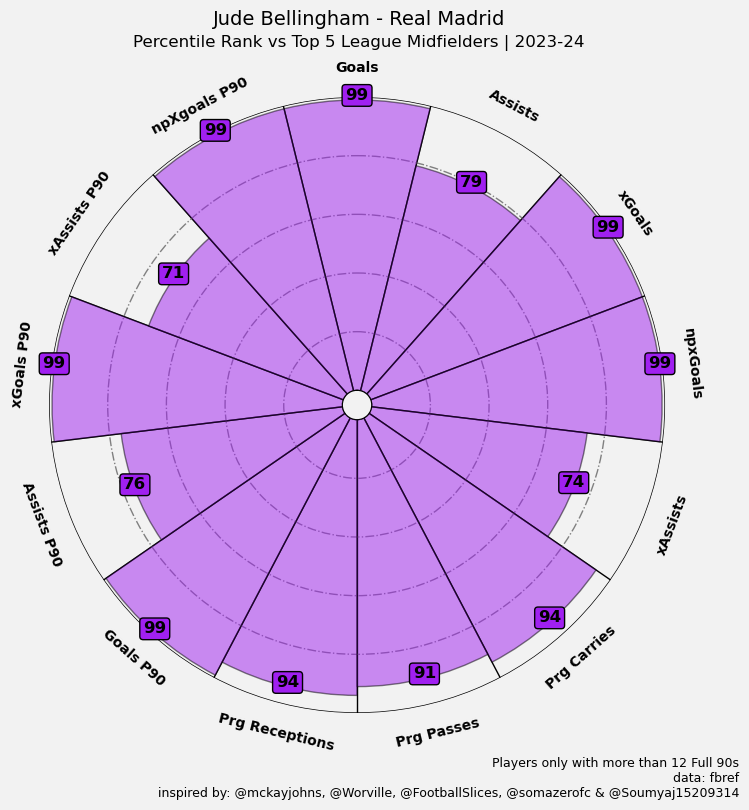

In [77]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#A020F0", edgecolor="#000000", alpha=0.5,
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=10,fontweight= 'bold',
        va="center", 
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, fontweight= 'bold',
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#A020F0",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Jude Bellingham - Real Madrid", size=14,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top 5 League Midfielders | 2023-24",
    size=12,
    ha="center", color="#000000"
)

# add credits
notes = 'Players only with more than 12 Full 90s'
CREDIT_1 = "data: fbref"
CREDIT_2 = "inspired by: @mckayjohns, @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

file_path = r'C:\Users\santo\Downloads/pizza.png'
fig.savefig('file_path',dpi=500,bbox_inches = 'tight')